In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [5]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.
#df = df.drop('volume-py', axis = 1)
#df = df.drop('density-py', axis =1)
df = df[df['Nsites'] == 10]
df = shuffle(df, random_state=2)
x = df.drop('Unnamed: 0', axis = 1)
x = x.drop('ID', axis = 1)
x = x.drop('full_formula', axis = 1)
x = x.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop('E_above_hull', axis = 1)
x = x.drop("Band_gap",axis = 1) #Aqui quitamos la columna que correponde a la energia de gap
y = np.asarray(df['Band_gap']) #Aqui definimos la cantidad que deseamos predecir, en este caso la energia de gap
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

In [6]:
x

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
1037,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.191923,1.515085
1260,0.0,0.950594,-0.345477,-0.196130,-0.456740,0.033659,0.131322,-0.242201,0.104480,-0.143712,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.305644,0.398318
1125,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.159803,1.224994
1152,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.207065,1.078429
786,0.0,-1.050876,-1.413494,-1.179859,-0.456740,0.451272,-0.524773,-0.242201,0.449520,-0.600669,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,25.774425,-3.073529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0.0,0.950594,0.663206,0.787599,-0.735972,-0.950713,0.951440,-0.242201,-0.912480,-0.767325,...,0.745602,1.142641,1.345178,-0.775486,0.950594,1.842578,0.076877,0.674127,0.006117,-0.265014
956,0.0,0.950594,-0.404811,-0.196130,-0.735972,-0.771737,0.295345,-0.242201,-0.425187,-1.122523,...,0.745602,1.142641,1.345178,-0.775486,0.950594,1.842578,0.076877,0.674127,-0.052858,-0.581530
865,0.0,0.950594,0.663206,0.787599,-0.735972,-0.950713,0.951440,-0.242201,-0.912480,-0.767325,...,2.179194,1.142641,0.702997,-0.775486,0.950594,1.838920,1.129701,2.223248,0.613715,-1.111678
899,0.0,0.950594,0.663206,0.787599,-0.735972,-0.950713,0.951440,-0.242201,-0.912480,-0.767325,...,0.745602,1.142641,1.345178,-0.775486,0.950594,1.842578,0.076877,0.674127,0.033916,-0.859746


In [7]:
X_train

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
594,0.0,-1.050876,-1.413494,-1.179859,-0.456740,0.451272,-0.524773,-0.242201,0.449520,-0.600669,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.344619,1.494889
262,0.0,-1.050876,0.781875,0.787599,0.101724,-0.264635,0.590588,-0.242201,-0.582573,0.674205,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.219514,0.366157
394,0.0,-1.050876,-0.345477,-0.196130,-0.456740,0.033659,0.131322,-0.242201,0.104480,-0.143712,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.351713,0.077892
263,0.0,-1.050876,-2.422177,-3.147317,-0.735972,1.077691,-2.952323,-0.242201,3.235062,-1.322586,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.432923,-0.633153
980,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.147095,-0.089973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,-1.050876,-1.947503,-2.163588,-0.735972,0.302125,-1.476110,-0.242201,1.543156,-1.322586,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.189624,-0.676880
1221,0.0,0.950594,0.781875,0.787599,0.101724,-0.264635,0.590588,-0.242201,-0.582573,0.674205,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.302585,0.883691
1112,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.191702,1.243293
1010,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.201607,1.034846


In [8]:
X_test

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
1324,0.0,0.950594,-0.345477,-0.196130,-0.456740,0.033659,0.131322,-0.242201,0.104480,-0.143712,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.296000,0.798122
895,0.0,0.950594,0.663206,0.787599,-0.735972,-0.950713,0.951440,-0.242201,-0.912480,-0.767325,...,0.745602,1.142641,1.345178,-0.775486,0.950594,1.842578,0.076877,0.674127,0.057652,-0.634283
804,0.0,-1.050876,1.553221,0.787599,3.731742,0.182807,0.032907,7.535293,-0.696578,0.674205,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,0.412128,0.743966
1029,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.157535,0.855788
727,0.0,-1.050876,-1.888169,-2.163588,2.335582,1.197009,-2.132205,1.054048,-0.132609,0.367006,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.216858,-1.507983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.0,-1.050876,1.078546,0.787599,1.497885,-3.605537,0.393759,-0.242201,-0.450409,0.674205,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.298105,0.017242
1232,0.0,0.950594,-1.947503,-2.163588,-0.735972,0.302125,-1.476110,-0.242201,1.543156,-1.322586,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.312274,-0.499965
343,0.0,-1.050876,0.247866,-0.196130,2.335582,1.704110,-1.443305,1.054048,-0.333378,-0.170591,...,-0.986654,-1.046659,-1.040459,-0.775486,-1.050876,-0.936233,-0.995004,-0.907232,-0.335426,-0.371849
1003,0.0,0.950594,0.722541,0.787599,-0.177508,-0.324294,0.689002,-0.242201,-0.544236,0.597405,...,0.715736,0.868979,0.886857,1.288168,0.950594,0.452050,1.024895,0.581556,-0.185132,1.455786


<function matplotlib.pyplot.show(close=None, block=None)>

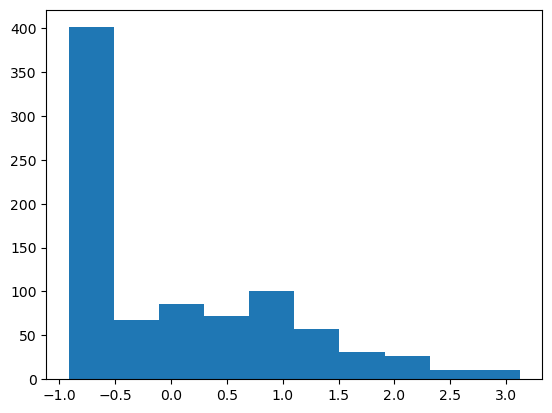

In [9]:
plt.hist(y_train, bins = 10 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

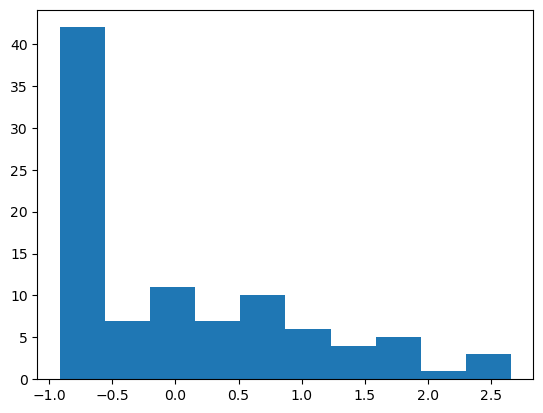

In [10]:
plt.hist(y_test, bins = 10 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

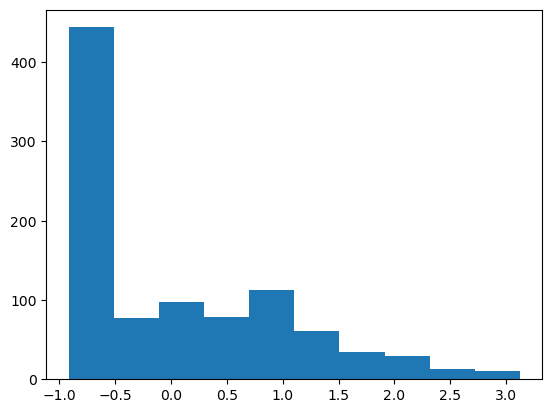

In [11]:
plt.hist(y, bins = 10)
plt.show

In [12]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5, n_jobs=-1)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.4550
Model| R2 sq on test set: 0.5812
Model| MSE on test set: 0.4159
Model| MAE on test set: 0.5525
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

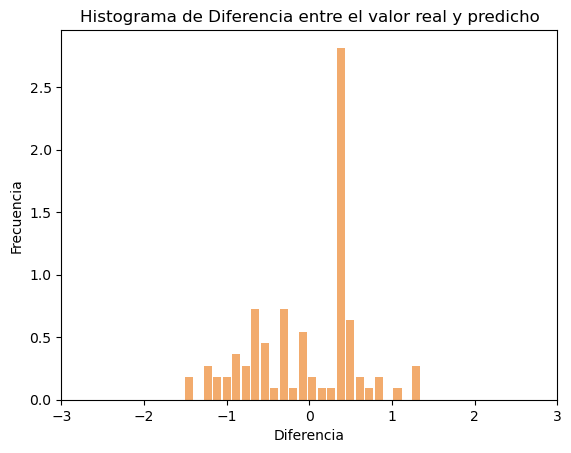

In [13]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

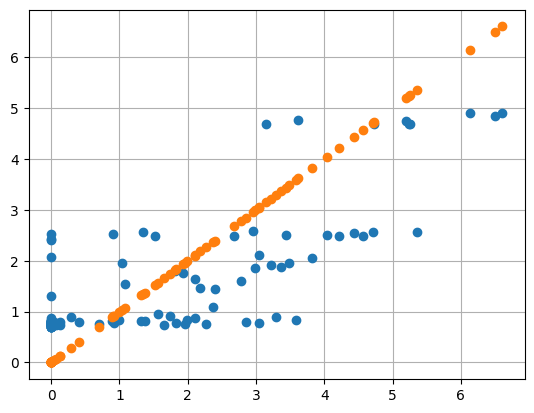

In [14]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [15]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.2148
Model| R2 sq on test set: 0.1793
Model| MSE on test set: 2.7864
Model| MAE on test set: 1.3870
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

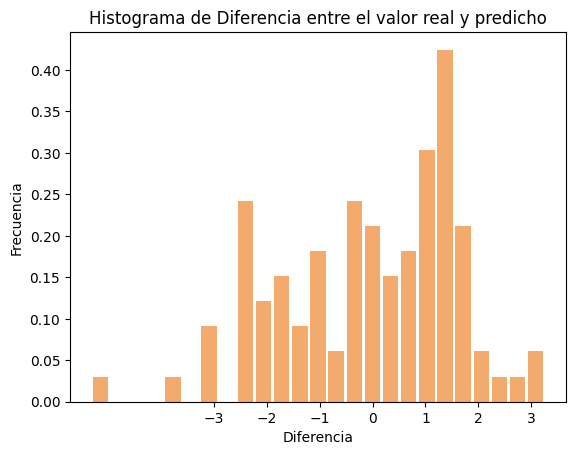

In [16]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

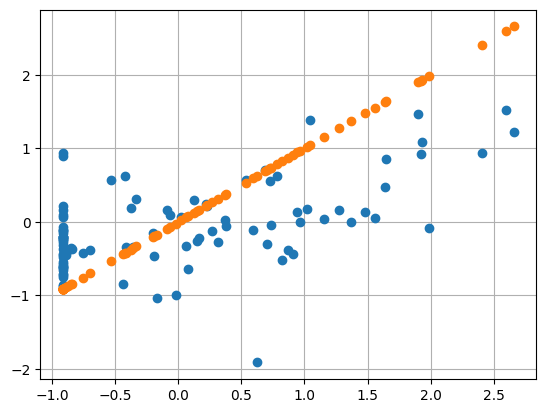

In [11]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [14]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5,n_jobs=-1,  verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.7733
Model| MSE on test set: 0.2251
Model| MAE on test set: 0.2458
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

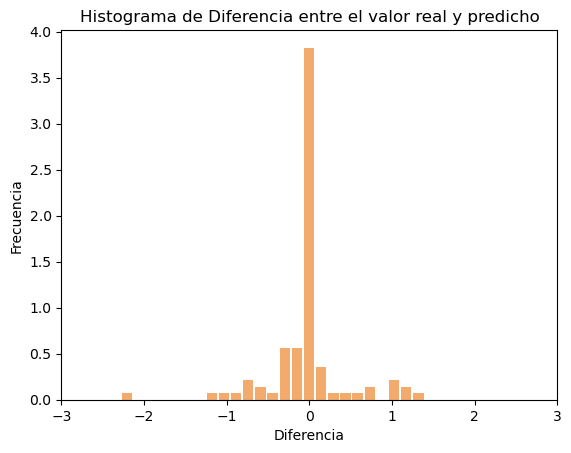

In [15]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

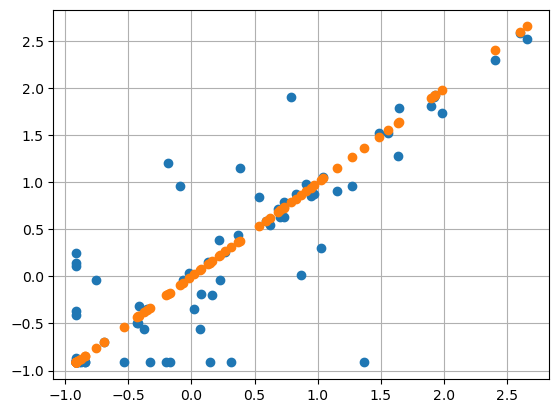

In [16]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [17]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: -0.0003
Model| MSE on test set: 0.9934
Model| MAE on test set: 0.8468
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

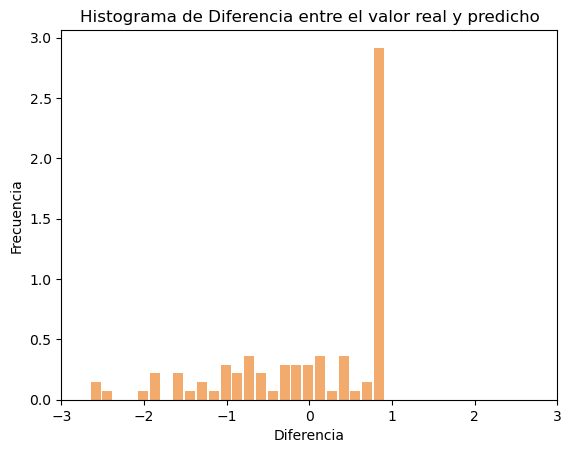

In [18]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

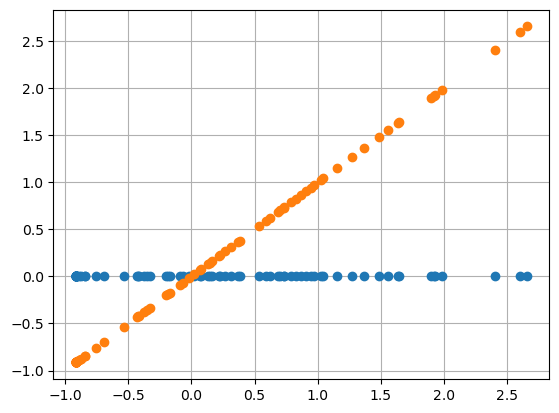

In [19]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [20]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5,n_jobs=-1, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.9978
Model| R2 sq on test set: 0.8306
Model| MSE on test set: 0.1683
Model| MAE on test set: 0.2705
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

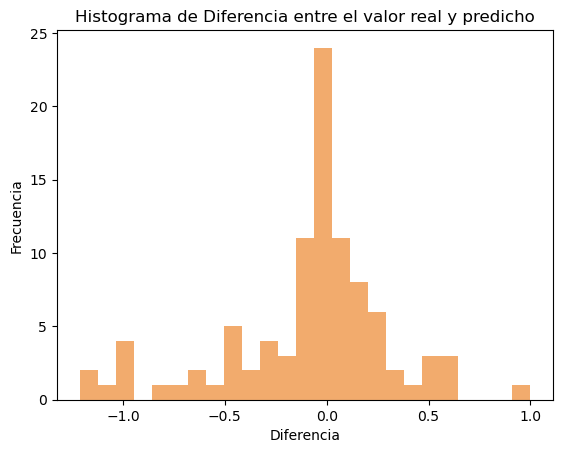

In [21]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

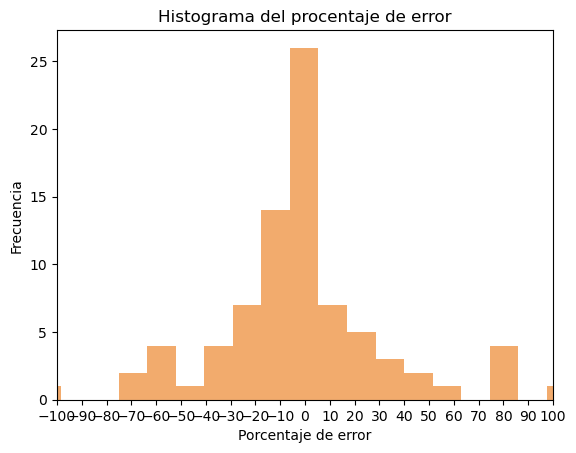

In [22]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=500, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
plt.xticks(range(-100,101,10))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

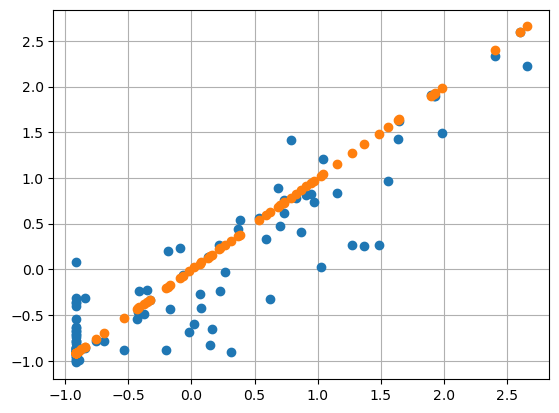

In [23]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.xlabel('')
plt.grid()
plt.show

In [24]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,n_jobs=-1,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.4320
Model| R2 sq on test set: 0.3449
Model| MSE on test set: 0.6506
Model| MAE on test set: 0.6346
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

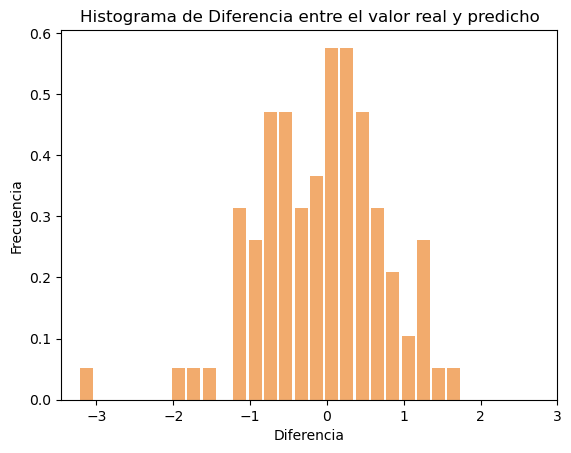

In [25]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

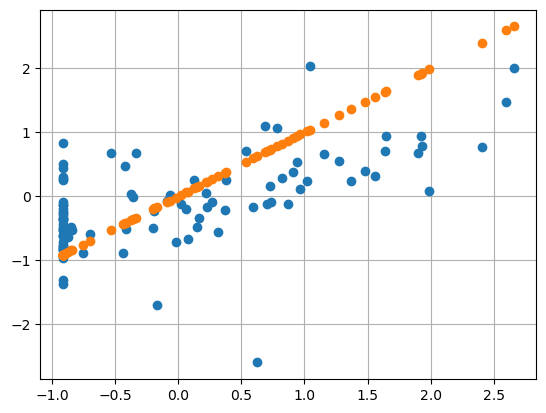

In [26]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [24]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.3619
Model| MSE on test set: 0.6337
Model| MAE on test set: 0.5595
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

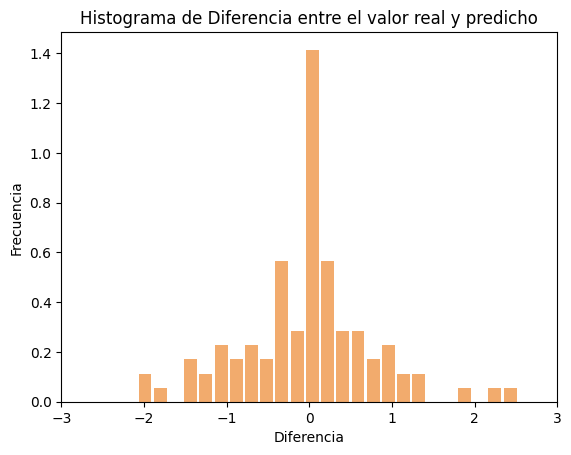

In [25]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

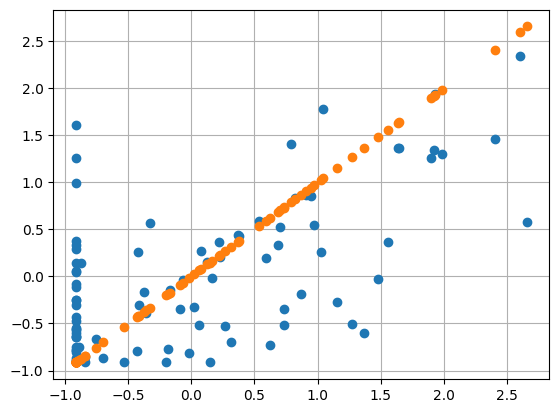

In [26]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [27]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.114 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.078 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.017 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.885 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.185 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.1399
Model| R2 sq on test set: 0.1477
Model| MSE on test set: 0.8465
Model| MAE on test set: 0.7083
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

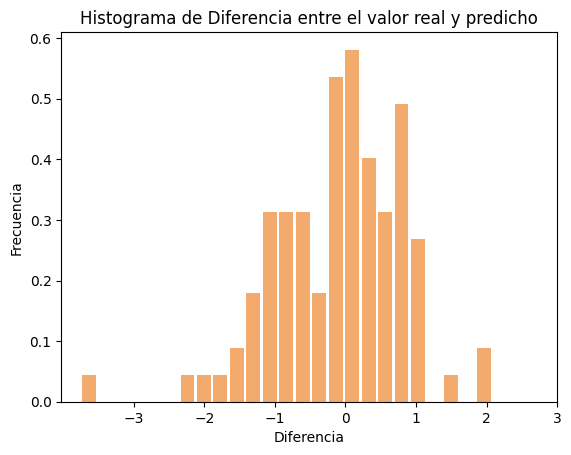

In [28]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

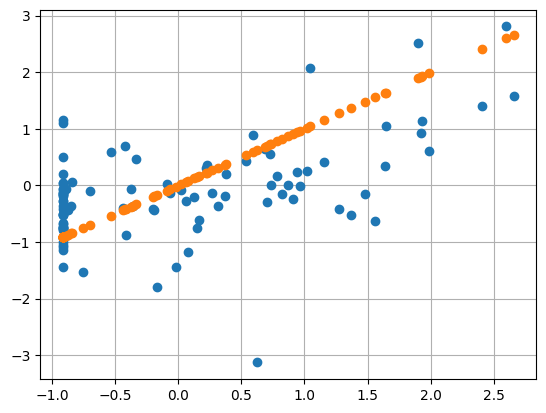

In [29]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [30]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.672 total time=   1.0s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.591 total time=   1.0s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.727 total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.677 total time=   1.5s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.686 total time=   1.2s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.665 total time=   1.3s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.598 total time=   2.2s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.720 total time=   2.3s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.682 total time=   1.5s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9616
Model| R2 sq on test set: 0.8029
Model| MSE on test set: 0.1958
Model| MAE on test set: 0.3295
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

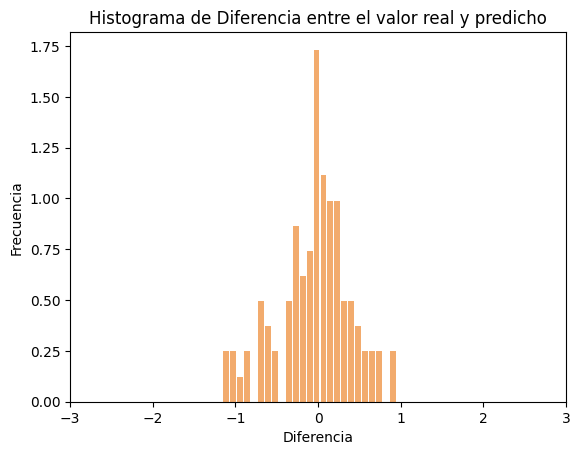

In [31]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

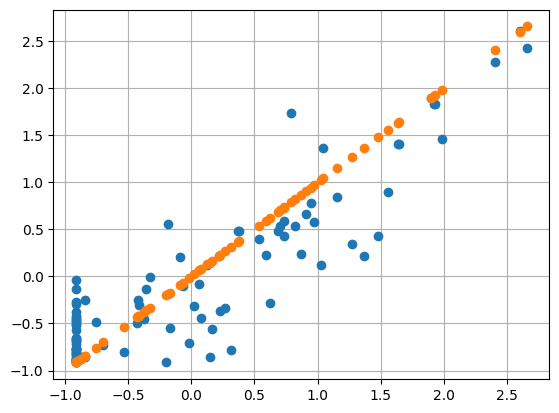

In [32]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [33]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.2636
Model| R2 sq on test set: 0.2083
Model| MSE on test set: 0.7862
Model| MAE on test set: 0.7374
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

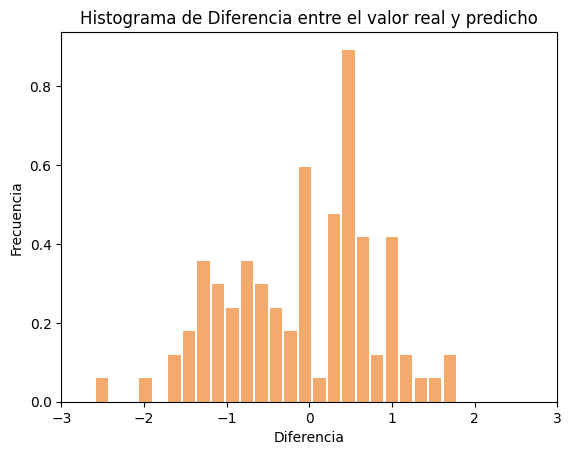

In [34]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

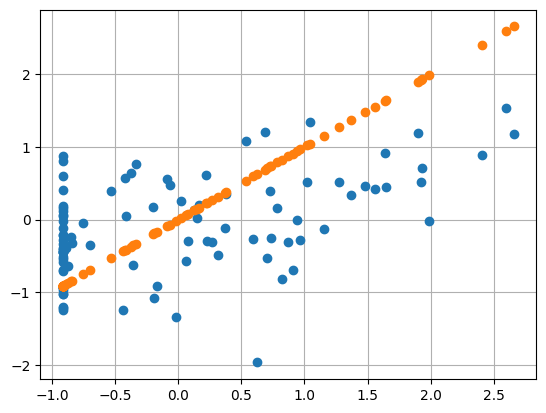

In [35]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [36]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.7671
Model| R2 sq on test set: 0.3518
Model| MSE on test set: 0.6437
Model| MAE on test set: 0.4882
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

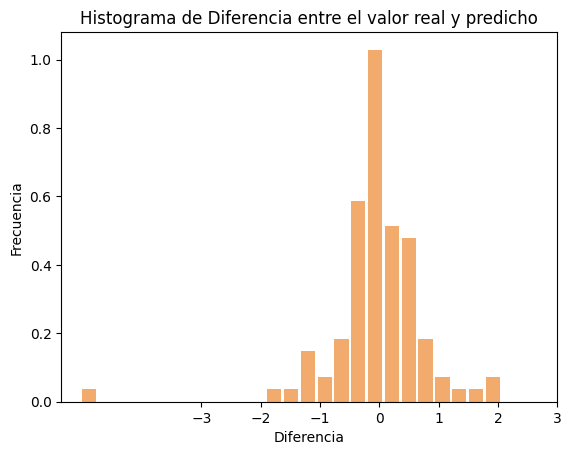

In [37]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

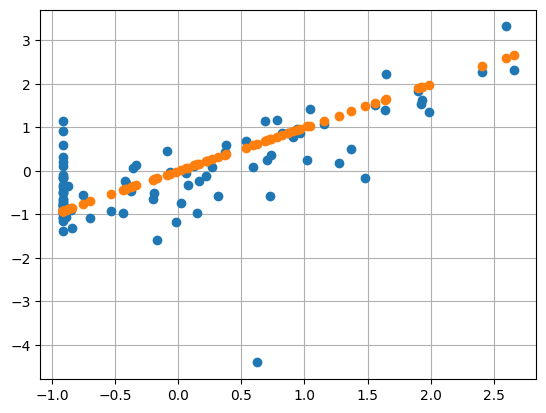

In [38]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show